In [1]:
import pandas as pd
df=pd.read_excel("MH_MTGT_Rural_Comp_Scaled.xlsx")
df.head()

In [152]:
df.columns

Index(['Month', 'Sales', 'MH/Impression/Dabur/Rural',
       'MH/Impression/Parachute Jasmine/Rural',
       'MH/Impression/Parachute/Rural',
       'MH - Rural -Promo Compi Contri on Overall(%)',
       'MH -Rural- Cost/ML Competition Aggregated Mean ',
       'MH - Print Spends Competition Aggregated Sum (Urban)', 'Month number'],
      dtype='object')

In [19]:
#pip install pymc3 --no-deps
len(df["Month"])
import numpy as np
df["Month number"]=np.arange(1,56,1)

In [94]:
data=df['Sales']
data

0     32.939053
1     39.139939
2     33.822660
3     30.620215
4     35.878881
5     41.197055
6     40.578853
7     39.688395
8     39.128989
9     36.610379
10    35.455686
11    34.599874
12    33.297303
13    39.380330
14    37.996230
15    30.264306
16    40.916109
17    32.500309
18    37.127158
19    41.330182
20    37.394970
21    31.604428
22    34.457681
23    13.356678
24    32.439746
25    56.136874
26    42.476626
27    34.970428
28    37.086856
29    34.139142
30    38.696893
31    40.504130
32    39.358411
33    41.949364
34    37.853917
35    30.992733
36    31.387750
37    37.153624
38    42.783819
39    34.197859
40    30.922177
41    41.126498
42    31.705357
43    36.751804
44    36.520969
45    27.834019
46    36.323812
47    27.750916
48    29.374438
49    38.009225
50    34.620611
51    36.382197
52    41.063483
53    34.337696
54    40.658123
Name: Sales, dtype: float64

In [45]:
import pymc3 as pm
import numpy as np

# Define the model
with pm.Model() as model:
    # Prior distributions for p and q
    p = pm.Uniform("p", 0, 1)
    q = pm.Uniform("q", 0, 1)
    
    # Define the likelihood function
    likelihood = pm.Poisson("likelihood", mu=p + (1-p) * q ** np.arange(1, len(data) + 1), observed=data)
    
    # Perform Markov Chain Monte Carlo sampling
    trace = pm.sample(draws=5000, tune=2000, return_inferencedata=False)

# Extract the samples of p and q
p_samples = trace["p"]
q_samples = trace["q"]

# Summary statistics of the samples
p_mean = np.mean(p_samples)
p_std = np.std(p_samples)
q_mean = np.mean(q_samples)
q_std = np.std(q_samples)

print("p mean:", p_mean)
print("p std:", p_std)
print("q mean:", q_mean)
print("q std:", q_std)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [q, p]


Sampling 2 chains for 2_000 tune and 5_000 draw iterations (4_000 + 10_000 draws total) took 767 seconds.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


p mean: 0.9702207392773027
p std: 0.11939538933364681
q mean: 0.6159126831769743
q std: 0.33079286465581476


In [72]:
data

0     32.939053
1     39.139939
2     33.822660
3     30.620215
4     35.878881
5     41.197055
6     40.578853
7     39.688395
8     39.128989
9     36.610379
10    35.455686
11    34.599874
12    33.297303
13    39.380330
14    37.996230
15    30.264306
16    40.916109
17    32.500309
18    37.127158
19    41.330182
20    37.394970
21    31.604428
22    34.457681
23    13.356678
24    32.439746
25    56.136874
26    42.476626
27    34.970428
28    37.086856
29    34.139142
30    38.696893
31    40.504130
32    39.358411
33    41.949364
34    37.853917
35    30.992733
36    31.387750
37    37.153624
38    42.783819
39    34.197859
40    30.922177
41    41.126498
42    31.705357
43    36.751804
44    36.520969
45    27.834019
46    36.323812
47    27.750916
48    29.374438
49    38.009225
50    34.620611
51    36.382197
52    41.063483
53    34.337696
54    40.658123
Name: Sales, dtype: float64

In [47]:
p=p_mean
q=q_mean

In [48]:


# Define a function to estimate the adstock rate using the Bass Diffusion Model
def estimate_adstock_rate(data, p, q):
    # data is a list of the number of individuals who have adopted the product or idea over time
    # p is the innovation coefficient
    # q is the imitation coefficient
    
    # Initialize an empty list to store the adstock values
    adstock_values = []
    
    # Loop through the data and calculate the adstock value at each time step
    for i in range(len(data)):
        # Initialize the adstock value to 0
        adstock_value = 0
        
        # Loop through previous time steps to calculate the adstock value
        for j in range(i):
            adstock_value += data[j] * (p + (1-p) * q) ** (i-j)
            
        # Append the adstock value to the list
        adstock_values.append(adstock_value)
        
    return adstock_values


adstock_values = estimate_adstock_rate(data, p, q)
print(adstock_values)


[0, 32.56230163084249, 70.8821224135227, 103.50718604971624, 132.59327350005015, 166.54519798288743, 205.3661311005995, 243.1319057602554, 279.58544798954176, 315.0690336448943, 347.65696092783304, 378.7306675648658, 408.60293489791735, 436.84585573957196, 470.7791887997272, 502.9561290588891, 527.1215466590751, 561.540533943828, 587.246300573154, 617.2319772229587, 651.0296326748144, 680.550514929227, 704.0094316626976, 730.0206470059409, 734.8746971439685, 758.5380263036931, 805.3567820875768, 838.1360281573727, 863.1200071800189, 889.9104448642851, 913.4804591792487, 941.2865031838822, 970.5610727715119, 998.3681903572909, 1028.418572776531, 1054.0766392000298, 1072.6585263144, 1091.4183759918017, 1115.663577862329, 1145.1972647139942, 1165.9053948149826, 1183.1384543665827, 1210.2620100169363, 1227.7619470391014, 1250.050449665322, 1271.8558258130681, 1284.8242054505372, 1306.0369422005467, 1318.5322114399569, 1332.4895141865388, 1354.8231992089857, 1373.5515794018793, 1393.8071842

In [138]:
data.columns

Index(['Sales', 'adstock', 'spend'], dtype='object')

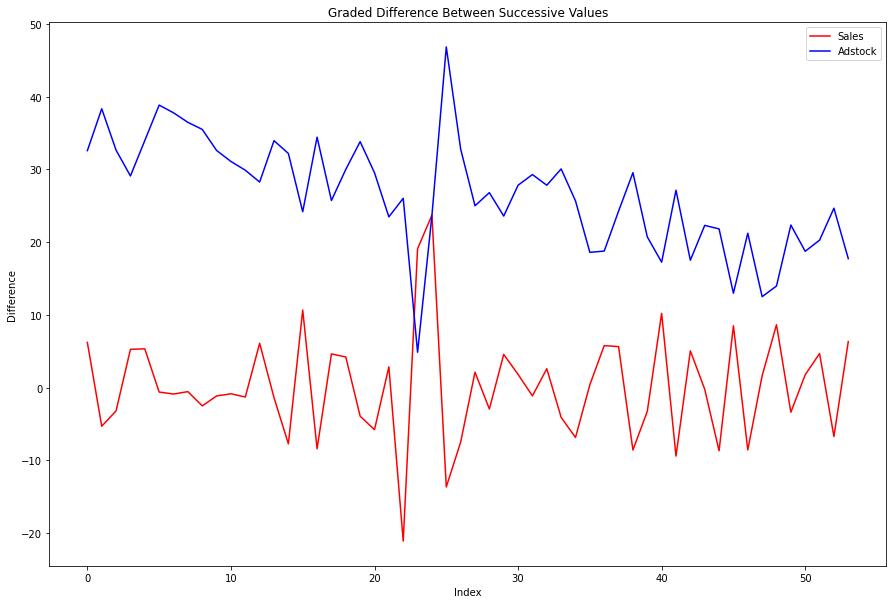

1

In [151]:
data=pd.DataFrame(data)
data["spend"]=df["MH - Print Spends Competition Aggregated Sum (Urban)"]
data["adstock"]=pd.Series(adstock_values)
#data.iloc[2,1]= 
#(1-x)*data.iloc[2,2]+x*data.iloc[1,1]
#df["Month"]
#70.882122=(1-x)*2166899+x*32.562302
plt.rcParams["figure.figsize"]=[15,10]
difference_sales = [data.iloc[i+1,0] - data.iloc[i,0] for i in range(len(data) - 1)]
difference_adstock = [data.iloc[i+1,1] - data.iloc[i,1] for i in range(len(data) - 1)]
difference_spend = [data.iloc[i+1,2] - data.iloc[i,2] for i in range(len(data) - 1)]

plt.tight_layout()
plt.plot(range(len(difference_sales)), difference_sales, color="red", label="Sales")
plt.plot(range(len(difference_adstock)), difference_adstock, color="blue", label="Adstock")
#plt.plot(range(len(difference_spend)), difference_spend, color="green", label="Spend")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Difference")
plt.title("Graded Difference Between Successive Values")
plt.show()

index_of_adspeak = np.argmax(difference_adstock)

# Get the x-axis value of the point of the highest peak
x_value_of_adspeak = range(len(difference_adstock))[index_of_adspeak]
x_value_of_adspeak

index_of_salespeak = np.argmax(difference_sales)

# Get the x-axis value of the point of the highest peak
x_value_of_salespeak = range(len(difference_sales))[index_of_salespeak]
x_value_of_salespeak


lag=x_value_of_adspeak-x_value_of_salespeak
lag

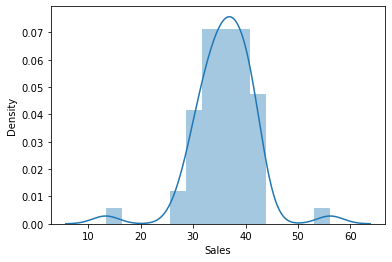

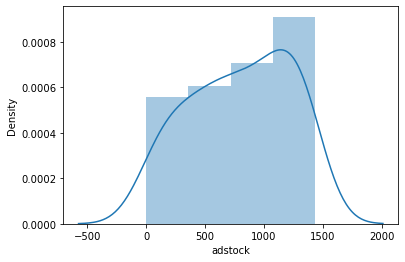

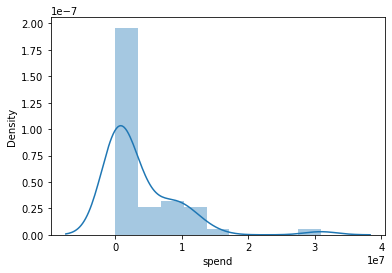

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
for i in data.columns:
    plt.tight_layout()
    sns.distplot(data[i])
    plt.show()